# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [2]:
! pip install lazypredict

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [4]:
df = pd.read_csv('https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [7]:
# Examine X dimension
X.shape

(4695, 881)

In [8]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [9]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions on both training and test sets
predictions_train = rf_model.predict(X_train)
predictions_test = rf_model.predict(X_test)
Y_pred = predictions_test  # Keep Y_pred as an alias for the scatter plot later

# Evaluate
mse = mean_squared_error(Y_test, predictions_test)
r2 = r2_score(Y_test, predictions_test)

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MSE: 1.1625952346426862
R2 Score: 0.5180299229226495


In [13]:
# Performance table of the training set (80% subset)
predictions_train

array([3.92476516, 4.99516533, 7.87548307, ..., 5.83692482, 6.07850355,
       5.9840408 ])

In [17]:
# Performance table of the test set (20% subset)
predictions_test

array([ 6.2749454 ,  5.69310132,  6.44208513,  3.54075048,  6.25420818,
        6.22056963,  5.82596896,  3.05405153,  5.28500992,  5.79213988,
        5.89829477,  5.21105781,  5.38581415,  5.54178076,  3.86128665,
        4.67460852,  5.2429511 ,  5.88957126,  5.34710447,  7.38794135,
        5.52286928,  7.61361415,  5.87823333,  7.67103269,  5.74685661,
        5.77943209,  5.21368478,  4.65624826,  7.92161241,  5.04434835,
        5.16346011,  4.19180017,  3.70233122,  5.05762789,  4.38179285,
        4.65624826,  5.88845531,  7.35083339,  5.60647927,  6.63524051,
        5.15926574,  6.32109549,  5.82439087,  4.80935769,  7.30595922,
        4.96312076,  6.89151691,  4.3519482 ,  4.32729653,  6.02182751,
        5.04736297,  7.10126662,  6.85543217,  7.30595922,  2.74502877,
        5.58842063,  5.68194594,  5.77048303,  7.29339501,  5.84902738,
        4.86095386,  3.59156733,  4.27724771,  5.27258109,  4.07594461,
        6.55514037,  5.72548247,  3.78741756,  4.16085117,  5.09

## **5. Data visualization of model performance**

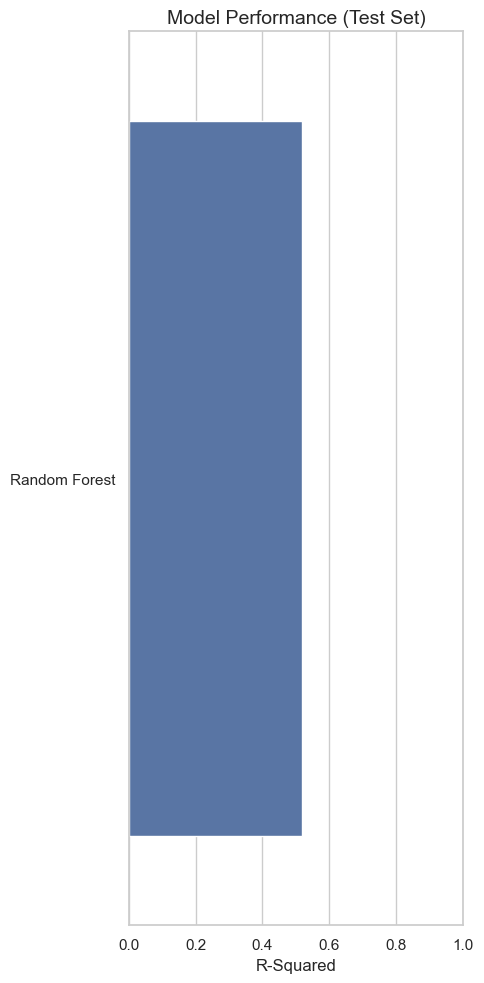

Training R²: 0.8294
Test R²: 0.5180


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate R-squared for training and test sets
from sklearn.metrics import r2_score

r2_train = r2_score(Y_train, predictions_train)
r2_test = r2_score(Y_test, predictions_test)

# Create a simple bar plot
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

models = ['Random Forest']
r2_scores = [r2_test]

ax = sns.barplot(x=r2_scores, y=models)
ax.set(xlim=(0, 1))
ax.set_xlabel('R-Squared', fontsize=12)
ax.set_title('Model Performance (Test Set)', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Training R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

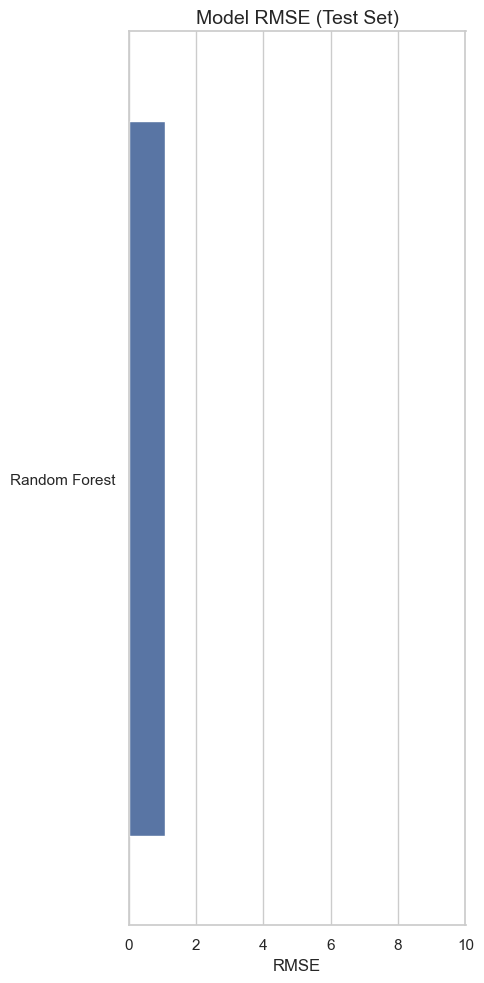

Training RMSE: 0.6413
Test RMSE: 1.0782


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for training and test sets
rmse_train = np.sqrt(mean_squared_error(Y_train, predictions_train))
rmse_test = np.sqrt(mean_squared_error(Y_test, predictions_test))

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

models = ['Random Forest']
rmse_scores = [rmse_test]

ax = sns.barplot(x=rmse_scores, y=models)
ax.set(xlim=(0, 10))
ax.set_xlabel('RMSE', fontsize=12)
ax.set_title('Model RMSE (Test Set)', fontsize=14)
plt.tight_layout()
plt.show()

print(f"Training RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

In [23]:
# Calculation time tracking would require timing the model training
# Since we already trained the model, we can skip this visualization
# or add timing in the training cell if needed

print("To track calculation time, wrap the model training in a timer:")
print("import time")
print("start = time.time()")
print("# ... model training code ...")
print("end = time.time()")
print(f"Training time would be calculated as: end - start")

To track calculation time, wrap the model training in a timer:
import time
start = time.time()
# ... model training code ...
end = time.time()
Training time would be calculated as: end - start
